<a href="https://colab.research.google.com/github/ahmarhafeez1/object_detection_yolov5/blob/main/Object_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Set up the environment
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import torch
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# Step 3: Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set the classes we're interested in (person, car, and animal classes from COCO)
model.classes = [0, 2, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Set confidence threshold
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45   # NMS IoU threshold


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-13 Python-3.10.12 torch-2.4.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 99.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
def getFrame(sec, quality=0.8):
    # JavaScript to capture frame from webcam
    js = Javascript('''
        async function getFrame(sec, quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            await new Promise(r => setTimeout(r, sec * 1000));
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            const result = canvas.toDataURL('image/jpeg', quality);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return result;
        }
    ''')
    display(js)
    data = eval_js('getFrame({}, {})'.format(sec, quality))
    binary = b64decode(data.split(',')[1])
    return PIL.Image.open(io.BytesIO(binary))

In [ ]:
def processFrame(frame):
    # Convert PIL Image to OpenCV format
    open_cv_image = np.array(frame.convert('RGB'))
    open_cv_image = open_cv_image[:, :, ::-1].copy()

    # Perform detection
    results = model(open_cv_image)

    # Process results
    for det in results.xyxy[0]:  # det is (x1, y1, x2, y2, conf, cls)
        x1, y1, x2, y2, conf, cls = det.tolist()
        label = model.names[int(cls)]
        color = (0, 255, 0) if label == 'person' else (0, 0, 255) if label == 'car' else (255, 0, 0)
        cv2.rectangle(open_cv_image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(open_cv_image, f'{label} {conf:.2f}', (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Convert back to PIL Image
    return PIL.Image.fromarray(open_cv_image[:, :, ::-1])


<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


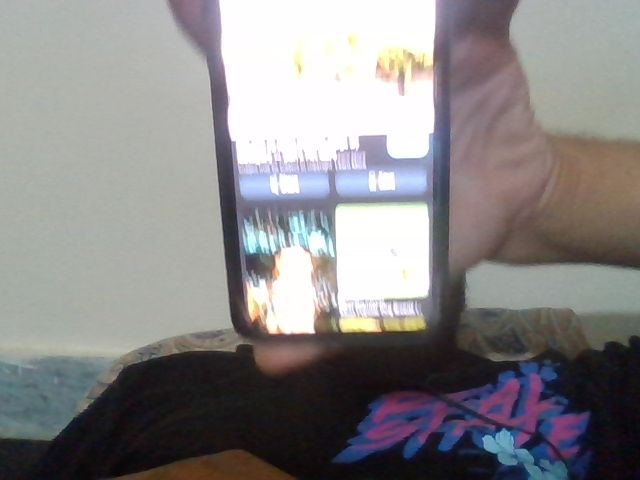

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


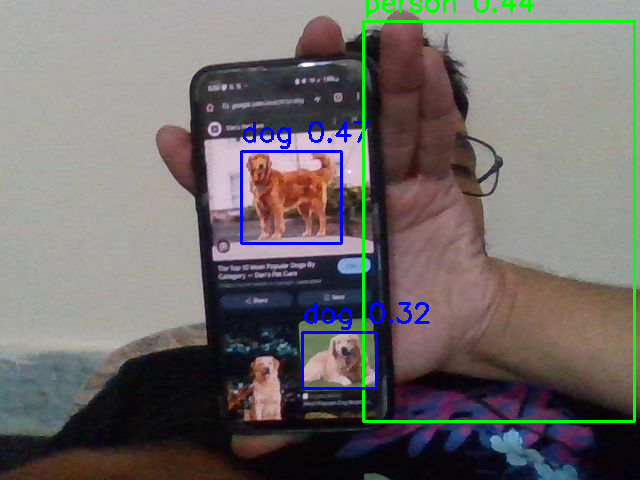

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


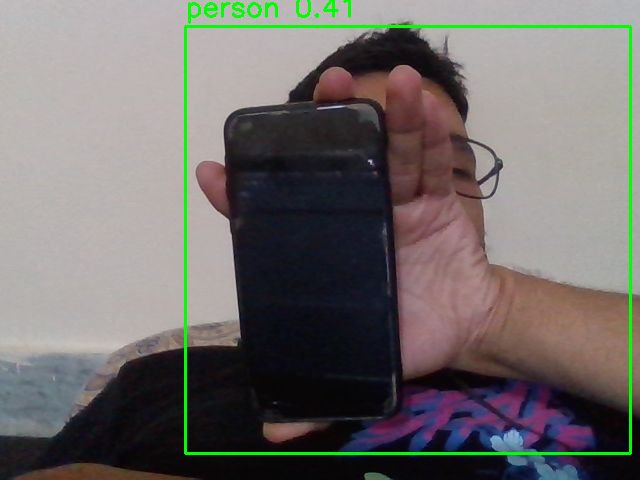

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


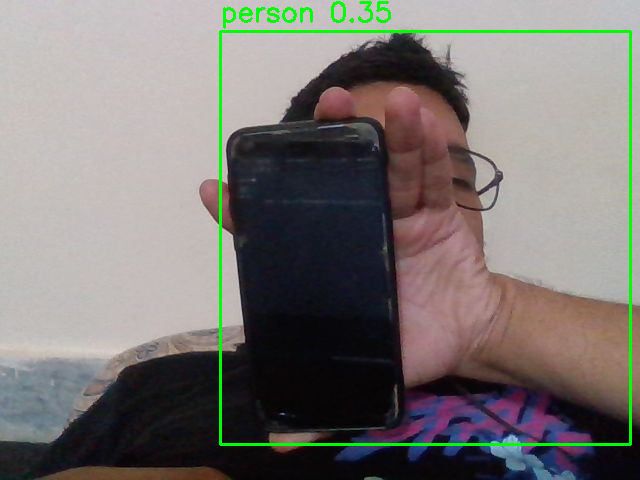

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


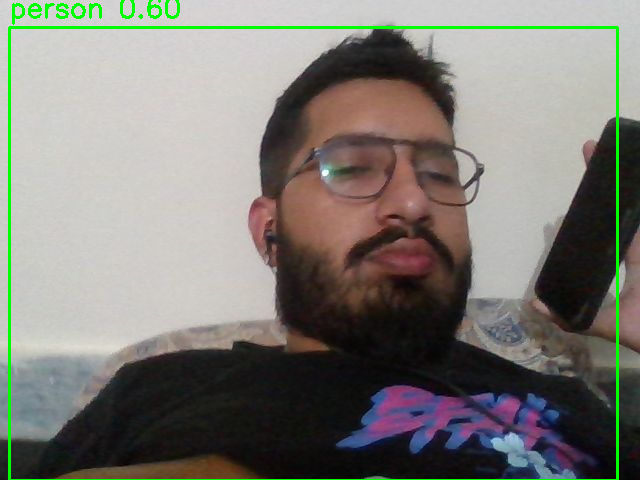

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


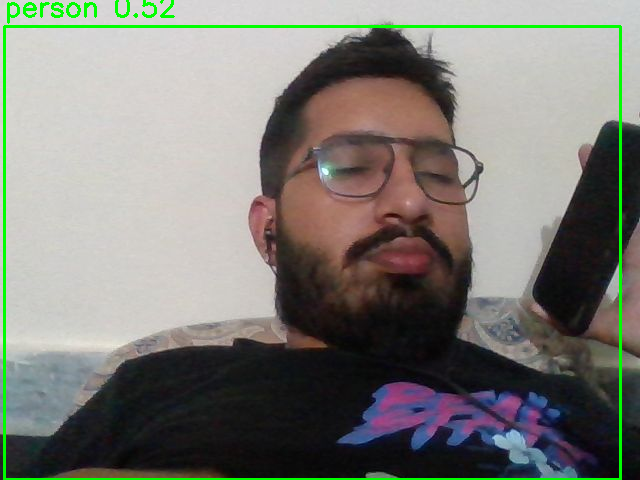

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


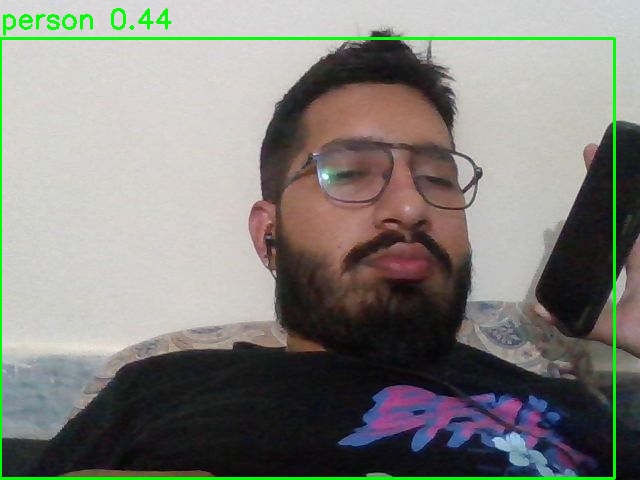

<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


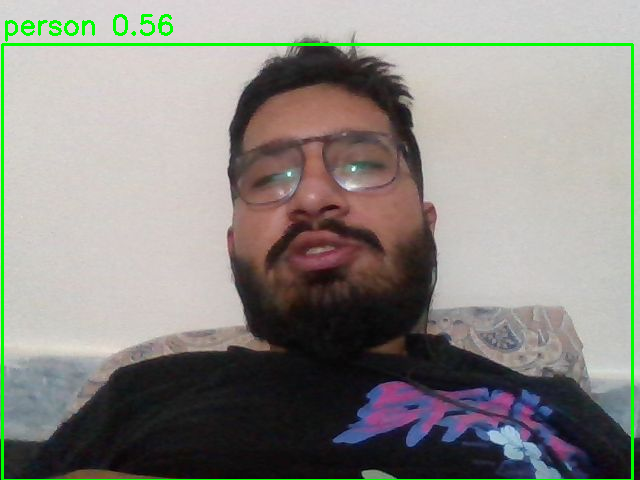

In [ ]:
# Step 5: Main loop for capturing and processing frames
def runDetection(duration=30, interval=1):
    start_time = time.time()
    while time.time() - start_time < duration:
        frame = getFrame(interval)
        processed_frame = processFrame(frame)
        display(processed_frame)

# Step 6: Run the detection
runDetection(duration=30, interval=1)

In [ ]:
from google.colab import files
import io
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
from PIL import Image

def upload_and_detect():
    # Upload an image
    uploaded = files.upload()

    # Get the uploaded image
    for filename in uploaded.keys():
        # Read the image file
        image = Image.open(io.BytesIO(uploaded[filename]))

        # Convert PIL Image to OpenCV format
        open_cv_image = np.array(image.convert('RGB'))
        open_cv_image = open_cv_image[:, :, ::-1].copy()

        # Perform detection
        results = model(open_cv_image)

        # Get the rendered image with detections from YOLOv5
        rendered_image = results.render()[0]

        # Convert back to RGB for displaying
        rgb_image = cv2.cvtColor(rendered_image, cv2.COLOR_BGR2RGB)

        # Display the result
        plt.figure(figsize=(12, 8))
        plt.imshow(rgb_image)
        plt.axis('off')
        plt.title('Detected Objects')
        plt.show()

        # Print detection summary
        print(results.pandas().xyxy[0])

# Run the function to upload and detect
upload_and_detect()

Saving luke-stackpoole-FA8HEWO9Vd8-unsplash.jpg to luke-stackpoole-FA8HEWO9Vd8-unsplash (1).jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


           xmin         ymin         xmax         ymax  confidence  class  \
0   2367.876465  4367.980957  2847.984375  5292.899414    0.832983      0   
1   2197.664795  4138.673340  2808.375000  4359.774414    0.760310     25   
2   3037.994873  4419.559570  4076.552002  5228.542480    0.748533      2   
3   1020.668579  4525.003906  1349.075317  5267.930664    0.704702      0   
4   1544.497192  4685.886719  1943.542603  5000.991699    0.678722      2   
5      1.610639  4762.121094   273.824310  5186.517578    0.623554      2   
6      0.000000  4555.680176   800.569275  5182.657715    0.570399      2   
7   4138.942383  4613.243164  4263.743652  4941.088379    0.477505      0   
8   1959.739746  4504.126953  2473.945312  5044.492188    0.420165      2   
9    772.592346  4652.354492  1072.773193  5094.694824    0.322297      2   
10   998.668579  4526.820312  1368.101074  5242.540039    0.288799      2   
11   428.890564  4573.242676  1067.417480  5132.801270    0.252945      2   